<a href="https://colab.research.google.com/github/koreabao/public_data/blob/main/%EB%82%A0%EC%94%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#google drive 권한 부여하기
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd

In [3]:
gtp = pd.read_csv('/content/drive/MyDrive/gtp_1.csv')

In [4]:
gtp

,지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,108,서울,1907-10,13.9,20.2,25.4,1907-10-05,8.3,3.3,1907-10-24
1,108,서울,1907-11,5.3,10.2,21.3,1907-11-01,0.6,-8.9,1907-11-30
2,108,서울,1907-12,-3.9,0.8,9.0,1907-12-13,-8.7,-20.1,1907-12-23
3,108,서울,1908-01,-3.5,0.1,6.2,1908-01-31,-7.5,-14.3,1908-01-22
4,108,서울,1908-02,-4.0,0.8,8.4,1908-02-27,-8.8,-15.8,1908-02-07
...,...,...,...,...,...,...,...,...,...,...
1340,108,서울,2020-08,26.5,29.3,34.5,2020-08-26,24.4,21.5,2020-08-23
1341,108,서울,2020-09,21.4,25.6,29.5,2020-09-01,18.0,13.6,2020-09-21
1342,108,서울,2020-10,14.3,19.5,23.6,2020-10-01,9.6,3.2,2020-10-24
1343,108,서울,2020-11,8.0,12.6,20.0,2020-11-17,4.0,-3.6,2020-11-30


In [5]:
tp1 = gtp.iloc[ : ,2:4]
tp1.columns = ['date','temperature']
tp2 = tp1.copy()
tp2


,date,temperature
0,1907-10,13.9
1,1907-11,5.3
2,1907-12,-3.9
3,1908-01,-3.5
4,1908-02,-4.0
...,...,...
1340,2020-08,26.5
1341,2020-09,21.4
1342,2020-10,14.3
1343,2020-11,8.0


In [6]:
tp2['date'] = pd.to_datetime(tp2['date'])
tp2.set_index('date',inplace=True)
tp2

,temperature
date,
1907-10-01,13.9
1907-11-01,5.3
1907-12-01,-3.9
1908-01-01,-3.5
1908-02-01,-4.0
...,...
2020-08-01,26.5
2020-09-01,21.4
2020-10-01,14.3


In [7]:
tp3 = tp2.copy()
tp3

,temperature
date,
1907-10-01,13.9
1907-11-01,5.3
1907-12-01,-3.9
1908-01-01,-3.5
1908-02-01,-4.0
...,...
2020-08-01,26.5
2020-09-01,21.4
2020-10-01,14.3


https://facebook.github.io/prophet/docs/quick_start.html

In [8]:
pf = tp3.copy()


In [9]:
pf1 = pf.reset_index()
pf1

,date,temperature
0,1907-10-01,13.9
1,1907-11-01,5.3
2,1907-12-01,-3.9
3,1908-01-01,-3.5
4,1908-02-01,-4.0
...,...,...
1340,2020-08-01,26.5
1341,2020-09-01,21.4
1342,2020-10-01,14.3
1343,2020-11-01,8.0


In [10]:
pf1.columns = ['ds','y']
pf1

,ds,y
0,1907-10-01,13.9
1,1907-11-01,5.3
2,1907-12-01,-3.9
3,1908-01-01,-3.5
4,1908-02-01,-4.0
...,...,...
1340,2020-08-01,26.5
1341,2020-09-01,21.4
1342,2020-10-01,14.3
1343,2020-11-01,8.0


In [11]:
from fbprophet import Prophet

model = Prophet()

In [12]:
#Prophet().fit(pf1) 같습니다. 
model.fit(pf1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**예측하기**

In [13]:
term = model.make_future_dataframe(periods=12,freq='MS')   #freq='YS' year start  , freq='Y'
term.tail(20)   

,ds
1337,2020-05-01
1338,2020-06-01
1339,2020-07-01
1340,2020-08-01
1341,2020-09-01
1342,2020-10-01
1343,2020-11-01
1344,2020-12-01
1345,2021-01-01
1346,2021-02-01


In [14]:
prediction=model.predict(term)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1907-10-01,10.518977,11.067678,14.369603,10.518977,10.518977,2.281490,2.281490,2.281490,2.281490,2.281490,2.281490,0.0,0.0,0.0,12.800466
1,1907-11-01,10.520408,3.676300,7.426731,10.520408,10.520408,-4.985802,-4.985802,-4.985802,-4.985802,-4.985802,-4.985802,0.0,0.0,0.0,5.534606
2,1907-12-01,10.521792,-4.021417,-0.411459,10.521792,10.521792,-12.652279,-12.652279,-12.652279,-12.652279,-12.652279,-12.652279,0.0,0.0,0.0,-2.130487
3,1908-01-01,10.523223,-6.313186,-2.901858,10.523223,10.523223,-15.018579,-15.018579,-15.018579,-15.018579,-15.018579,-15.018579,0.0,0.0,0.0,-4.495356
4,1908-02-01,10.524654,-4.131716,-0.662452,10.524654,10.524654,-12.922000,-12.922000,-12.922000,-12.922000,-12.922000,-12.922000,0.0,0.0,0.0,-2.397346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,2021-08-01,13.231267,25.239455,28.869167,13.231267,13.231267,13.788917,13.788917,13.788917,13.788917,13.788917,13.788917,0.0,0.0,0.0,27.020185
1353,2021-09-01,13.233659,20.444511,23.987118,13.233659,13.233659,8.884685,8.884685,8.884685,8.884685,8.884685,8.884685,0.0,0.0,0.0,22.118343
1354,2021-10-01,13.235973,13.733807,17.238972,13.235973,13.235973,2.272694,2.272694,2.272694,2.272694,2.272694,2.272694,0.0,0.0,0.0,15.508667
1355,2021-11-01,13.238364,6.133186,9.743690,13.238364,13.238364,-5.329804,-5.329804,-5.329804,-5.329804,-5.329804,-5.329804,0.0,0.0,0.0,7.908560


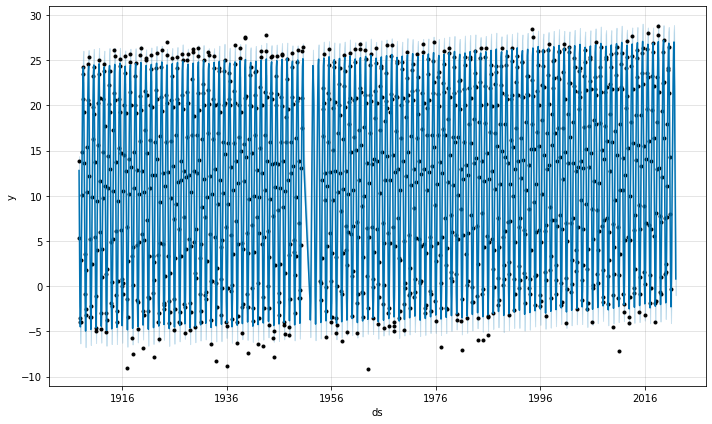

In [15]:
model.plot(prediction);

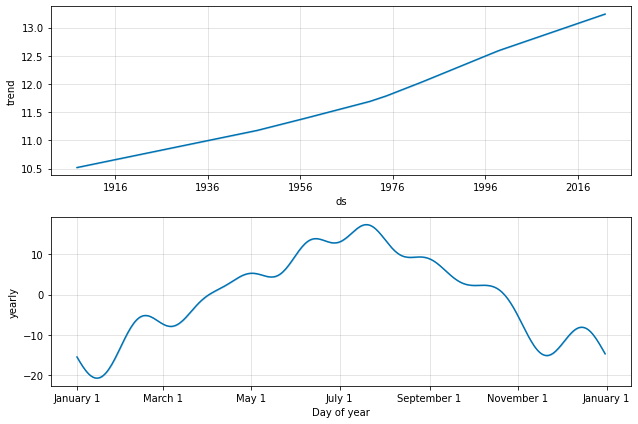

In [16]:
model.plot_components(prediction);

In [17]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1907-10-01,10.518977,11.067678,14.369603,10.518977,10.518977,2.281490,2.281490,2.281490,2.281490,2.281490,2.281490,0.0,0.0,0.0,12.800466
1,1907-11-01,10.520408,3.676300,7.426731,10.520408,10.520408,-4.985802,-4.985802,-4.985802,-4.985802,-4.985802,-4.985802,0.0,0.0,0.0,5.534606
2,1907-12-01,10.521792,-4.021417,-0.411459,10.521792,10.521792,-12.652279,-12.652279,-12.652279,-12.652279,-12.652279,-12.652279,0.0,0.0,0.0,-2.130487
3,1908-01-01,10.523223,-6.313186,-2.901858,10.523223,10.523223,-15.018579,-15.018579,-15.018579,-15.018579,-15.018579,-15.018579,0.0,0.0,0.0,-4.495356
4,1908-02-01,10.524654,-4.131716,-0.662452,10.524654,10.524654,-12.922000,-12.922000,-12.922000,-12.922000,-12.922000,-12.922000,0.0,0.0,0.0,-2.397346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,2021-08-01,13.231267,25.239455,28.869167,13.231267,13.231267,13.788917,13.788917,13.788917,13.788917,13.788917,13.788917,0.0,0.0,0.0,27.020185
1353,2021-09-01,13.233659,20.444511,23.987118,13.233659,13.233659,8.884685,8.884685,8.884685,8.884685,8.884685,8.884685,0.0,0.0,0.0,22.118343
1354,2021-10-01,13.235973,13.733807,17.238972,13.235973,13.235973,2.272694,2.272694,2.272694,2.272694,2.272694,2.272694,0.0,0.0,0.0,15.508667
1355,2021-11-01,13.238364,6.133186,9.743690,13.238364,13.238364,-5.329804,-5.329804,-5.329804,-5.329804,-5.329804,-5.329804,0.0,0.0,0.0,7.908560


In [18]:
#prediction.iloc[:,[0,-1]]
predS = prediction[['ds','yhat']]

In [19]:
predS

,ds,yhat
0,1907-10-01,12.800466
1,1907-11-01,5.534606
2,1907-12-01,-2.130487
3,1908-01-01,-4.495356
4,1908-02-01,-2.397346
...,...,...
1352,2021-08-01,27.020185
1353,2021-09-01,22.118343
1354,2021-10-01,15.508667
1355,2021-11-01,7.908560


In [20]:
predS.tail(12)

,ds,yhat
1345,2021-01-01,-2.278048
1346,2021-02-01,0.857407
1347,2021-03-01,5.942122
1348,2021-04-01,12.968841
1349,2021-05-01,18.520089
1350,2021-06-01,23.103856
1351,2021-07-01,26.296161
1352,2021-08-01,27.020185
1353,2021-09-01,22.118343
1354,2021-10-01,15.508667


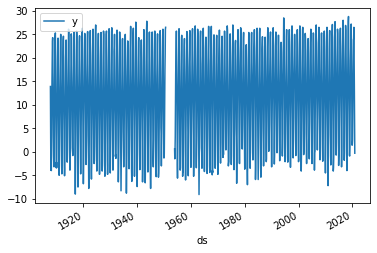

In [21]:
pf1.set_index('ds').plot();


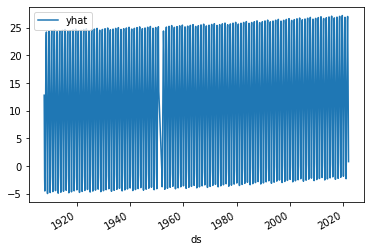

In [22]:
predS.set_index('ds').plot();

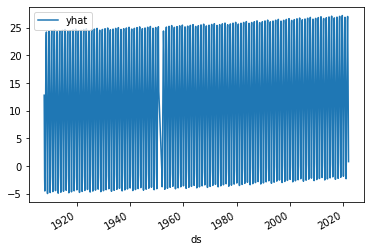

In [23]:
predS1 = predS.set_index('ds')
predS1.plot();

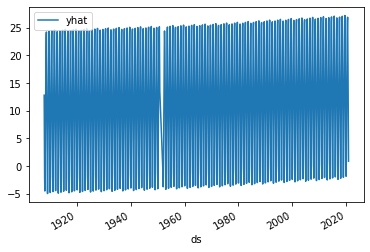

In [29]:
predS1[:'2020'].plot();

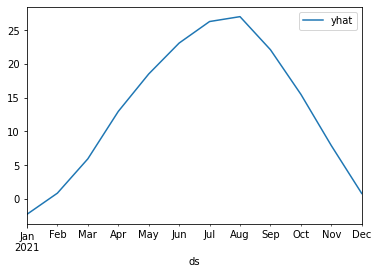

In [32]:
predS1['2021':].plot();

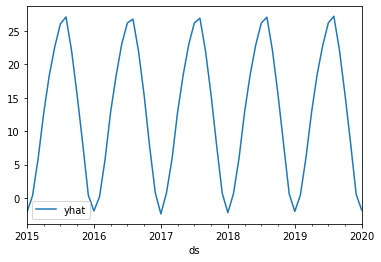

In [39]:
predS1['2015-01-01':'2020-01-01'].plot() #월 구간별 

In [ ]:
pf1

In [27]:
pf2 = pf1.set_index('ds')

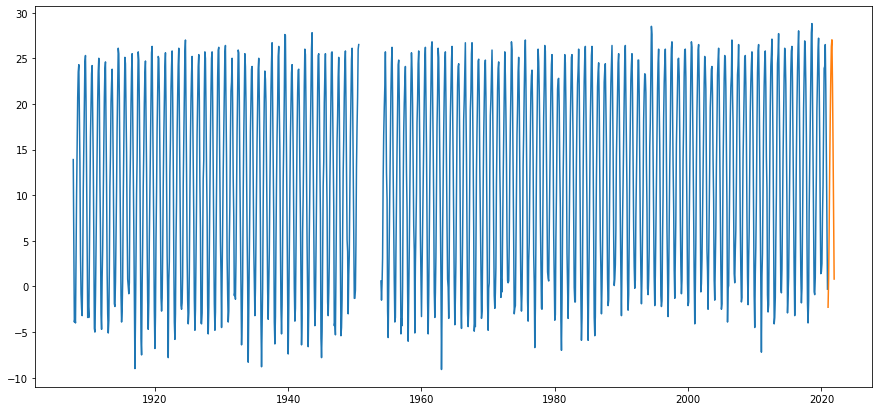

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(pf2[:'2020-12-01'])
plt.plot(predS1['2021-01-01':]);


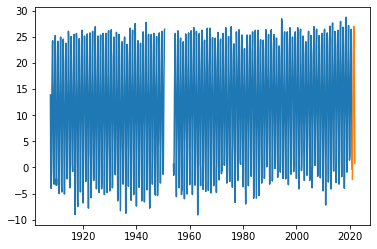

In [43]:
plt.plot(pf2[:'2020-12-01'])  #실측값

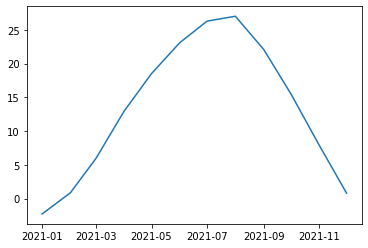

In [42]:
plt.plot(predS1['2021-01-01':])